In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [79]:
df = pd.read_csv("../../Data/sangwonKim/pop_house_car_inout.csv", index_col='년도')
df.head()

,시도,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
년도,,,,,,,,,
2013,서울특별시,10143645,5007869,5135776,NaN,NaN,38005651,1520090,1620640
2013,부산광역시,3527635,1747000,1780635,NaN,NaN,17380896,478451,496161
2013,대구광역시,2501588,1246071,1255517,NaN,NaN,14583073,351873,363224
2013,인천광역시,2879782,1448835,1430947,NaN,NaN,20097823,461613,439578
2013,광주광역시,1472910,730216,742694,NaN,NaN,8351445,226696,229288


In [80]:
# df.dropna(how='any', axis=0, inplace=True)
df

,시도,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
년도,,,,,,,,,
2013,서울특별시,10143645,5007869,5135776,NaN,NaN,38005651,1520090,1620640
2013,부산광역시,3527635,1747000,1780635,NaN,NaN,17380896,478451,496161
2013,대구광역시,2501588,1246071,1255517,NaN,NaN,14583073,351873,363224
2013,인천광역시,2879782,1448835,1430947,NaN,NaN,20097823,461613,439578
2013,광주광역시,1472910,730216,742694,NaN,NaN,8351445,226696,229288
...,...,...,...,...,...,...,...,...,...
2022,전라북도,1769607,880592,889015,NaN,NaN,11461086,199432,204547
2022,전라남도,1817697,915272,902425,NaN,NaN,13688569,191956,192301
2022,경상북도,2600492,1311881,1288611,NaN,NaN,17878739,263156,270822


In [81]:
df[df.index==2020]

,시도,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
년도,,,,,,,,,
2020,서울특별시,9668465,4701723,4966742,3015371.0,96629.0,38005651,1578127,1642977
2020,부산광역시,3391946,1661000,1730946,1275859.0,113410.0,17380896,491829,506176
2020,대구광역시,2418346,1193109,1225237,809802.0,39069.0,14583073,347248,364083
2020,인천광역시,2942828,1473943,1468885,1032774.0,65861.0,20097823,444556,460304
2020,광주광역시,1450062,717348,732714,538275.0,41585.0,8351445,226163,232246
2020,대전광역시,1463882,730699,733183,496875.0,26983.0,8274122,232321,243418
2020,울산광역시,1136017,583708,552309,394634.0,30241.0,6948158,136112,149696
2020,세종특별자치시,355831,177568,178263,136887.0,14385.0,2164838,78934,65909
2020,경기도,13427014,6754469,6672545,4495115.0,272358.0,73393515,2152572,1984199


----
# 전체 데이터를 한번에 정규화한 후에 -> 2020년도 추출하여 시각화

In [82]:
from sklearn import preprocessing

In [83]:
# 최대값과 최소값 가져오기
min_max_scaler = preprocessing.MinMaxScaler()

In [84]:
col = df.columns[1:]
x = df[col].values
x

array([[10143645.,  5007869.,  5135776., ..., 38005651.,  1520090.,
         1620640.],
       [ 3527635.,  1747000.,  1780635., ..., 17380896.,   478451.,
          496161.],
       [ 2501588.,  1246071.,  1255517., ..., 14583073.,   351873.,
          363224.],
       ...,
       [ 2600492.,  1311881.,  1288611., ..., 17878739.,   263156.,
          270822.],
       [ 3280493.,  1651675.,  1628818., ..., 21770014.,   323211.,
          341758.],
       [  678159.,   339590.,   338569., ...,  7670794.,    86865.,
           83717.]])

In [85]:
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[0.74413636, 0.72976423, 0.7586951 , ..., 0.50317954, 0.7028881 ,
        0.815367  ],
       [0.25287083, 0.24860224, 0.25719484, ..., 0.21362264, 0.21357246,
        0.24430168],
       [0.17668268, 0.17468697, 0.17870431, ..., 0.17434319, 0.15411175,
        0.17678979],
       ...,
       [0.18402671, 0.18439765, 0.18365094, ..., 0.220612  , 0.11243645,
        0.12986354],
       [0.23451953, 0.23453642, 0.23450243, ..., 0.27524274, 0.14064761,
        0.1658883 ],
       [0.0412857 , 0.04092992, 0.04164609, ..., 0.07729971, 0.02962278,
        0.03484249]])

In [86]:
# 정규화된 데이터프레임 생성
df_norm = pd.DataFrame(x_scaled, columns=col, index=df.index)
df_norm['시도'] = df['시도']
df_norm

,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구,시도
년도,,,,,,,,,
2013,0.744136,0.729764,0.758695,NaN,NaN,0.503180,0.702888,0.815367,서울특별시
2013,0.252871,0.248602,0.257195,NaN,NaN,0.213623,0.213572,0.244302,부산광역시
2013,0.176683,0.174687,0.178704,NaN,NaN,0.174343,0.154112,0.176790,대구광역시
2013,0.204765,0.204606,0.204926,NaN,NaN,0.251766,0.205663,0.215566,인천광역시
2013,0.100299,0.098569,0.102052,NaN,NaN,0.086856,0.095309,0.108771,광주광역시
...,...,...,...,...,...,...,...,...,...
2022,0.122330,0.120758,0.123922,NaN,NaN,0.130513,0.082502,0.096206,전라북도
2022,0.125901,0.125875,0.125927,NaN,NaN,0.161785,0.078990,0.089987,전라남도
2022,0.184027,0.184398,0.183651,NaN,NaN,0.220612,0.112436,0.129864,경상북도


In [87]:
df_norm[df_norm.index==2020]

,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구,시도
년도,,,,,,,,,
2020,0.708852,0.684590,0.733429,0.648165,0.321972,0.503180,0.730151,0.826711,서울특별시
2020,0.242795,0.235912,0.249768,0.263912,0.384425,0.213623,0.219857,0.249388,부산광역시
2020,0.170502,0.166872,0.174178,0.160961,0.107756,0.174343,0.151939,0.177226,대구광역시
2020,0.209447,0.208311,0.210597,0.210215,0.207466,0.251766,0.197650,0.226092,인천광역시
2020,0.098603,0.096671,0.100560,0.100982,0.117119,0.086856,0.095059,0.110273,광주광역시
2020,0.099629,0.098641,0.100630,0.091837,0.062776,0.085770,0.097952,0.115946,대전광역시
2020,0.075284,0.076951,0.073594,0.069252,0.074901,0.067154,0.052757,0.068350,울산광역시
2020,0.017352,0.017023,0.017685,0.012317,0.015891,0.000000,0.025897,0.025799,세종특별자치시
2020,0.987940,0.987486,0.988399,0.975036,0.975969,1.000000,1.000000,1.000000,경기도


In [88]:
df_2020 = df_norm[df_norm.index == 2020]
df_2020 = df_2020.set_index('시도')
df_2020

,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
시도,,,,,,,,
서울특별시,0.708852,0.684590,0.733429,0.648165,0.321972,0.503180,0.730151,0.826711
부산광역시,0.242795,0.235912,0.249768,0.263912,0.384425,0.213623,0.219857,0.249388
대구광역시,0.170502,0.166872,0.174178,0.160961,0.107756,0.174343,0.151939,0.177226
인천광역시,0.209447,0.208311,0.210597,0.210215,0.207466,0.251766,0.197650,0.226092
광주광역시,0.098603,0.096671,0.100560,0.100982,0.117119,0.086856,0.095059,0.110273
대전광역시,0.099629,0.098641,0.100630,0.091837,0.062776,0.085770,0.097952,0.115946
울산광역시,0.075284,0.076951,0.073594,0.069252,0.074901,0.067154,0.052757,0.068350
세종특별자치시,0.017352,0.017023,0.017685,0.012317,0.015891,0.000000,0.025897,0.025799
경기도,0.987940,0.987486,0.988399,0.975036,0.975969,1.000000,1.000000,1.000000


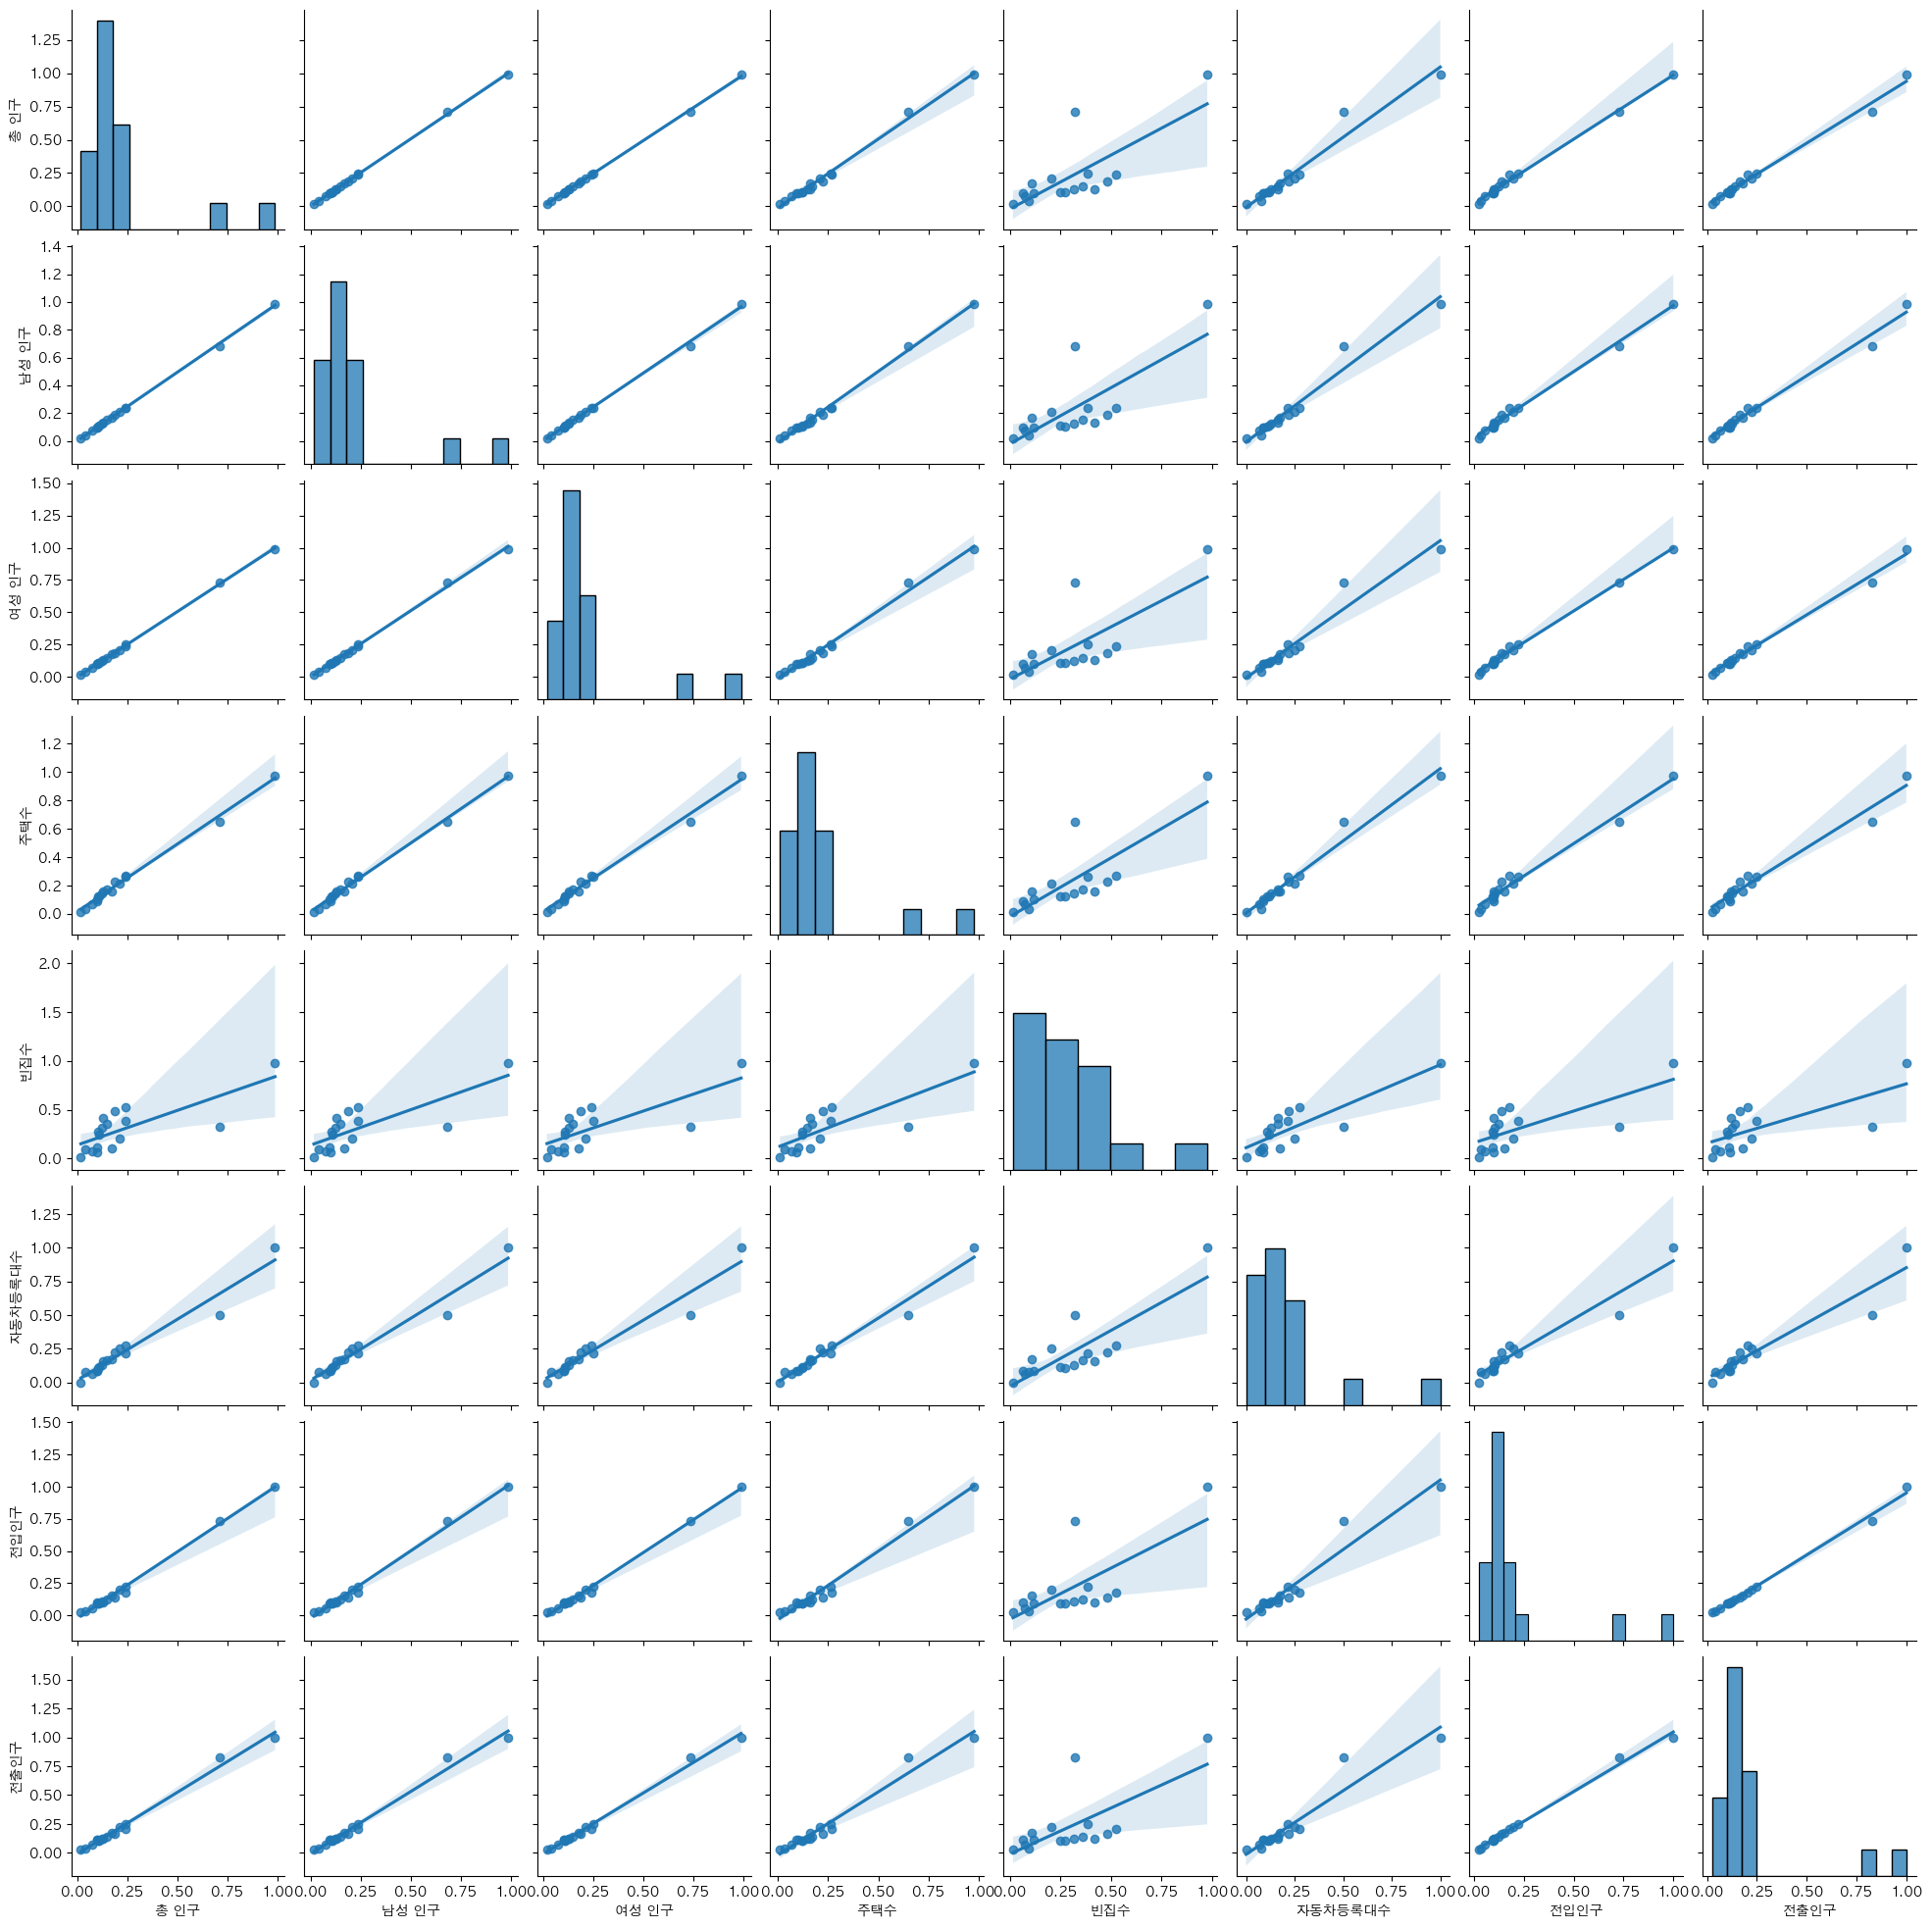

In [89]:
# 총 인구, 남성 인구, 여성 인구, 주택수, 빈집수, 자동차등록대수, 전입인구, 전출인구에 대한 상관관계 시각화
sns.pairplot(
    df_2020,
    vars = df_2020.columns,
    kind = 'reg'
)
plt.show()

### Heatmap을 이용한 확인

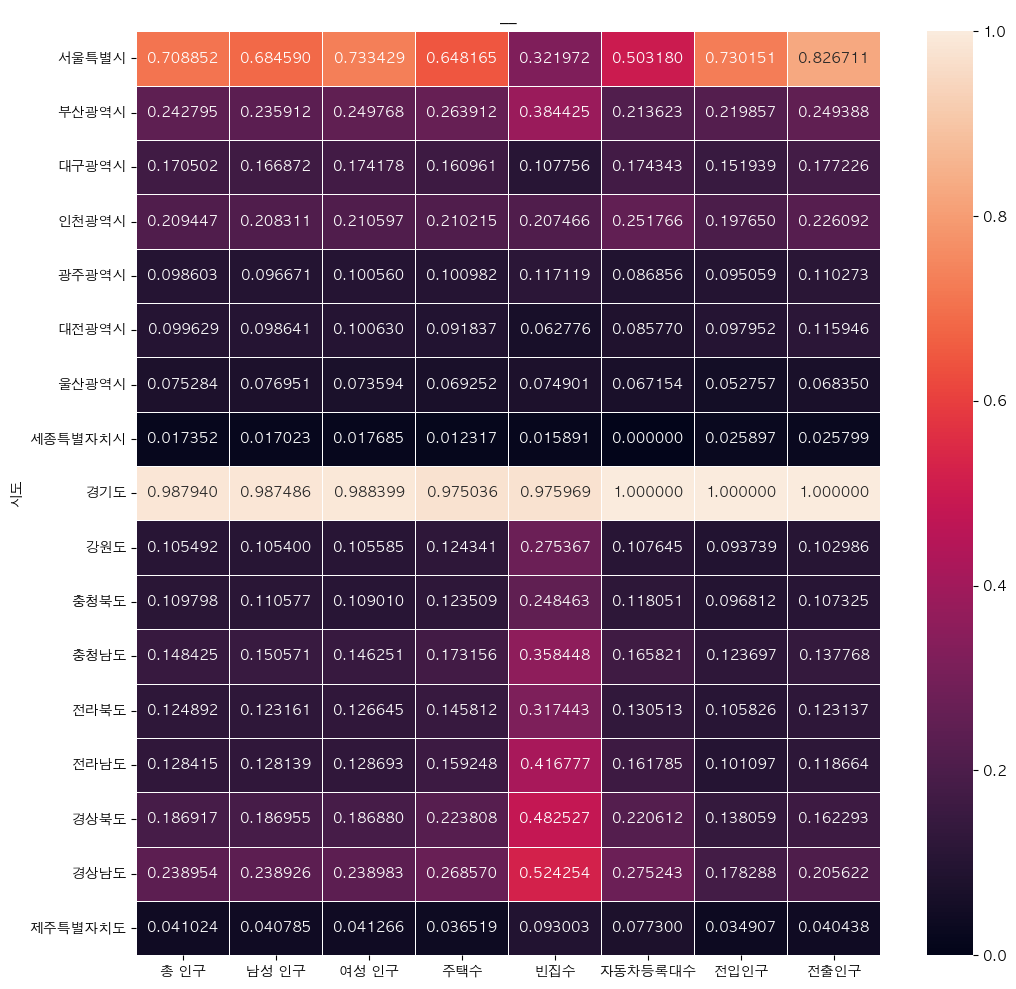

In [90]:
target_col = df_2020.columns

plt.figure(figsize=(12,12))
sns.heatmap(
    df_2020[target_col],
    annot = True, # True로 해야 숫자가 보임
    fmt = 'f', # 실수
    linewidth = 0.5
)
plt.title('__')
plt.show()

> ## 경기도, 세종시, 제주시 한쪽으로 치우침 / 빈집수 좋아보임
> ## 이번엔 먼저 추출한 후 정규화해보자

----
# 2020년도를 먼저 추출한 후에 정규화하여 시각화

In [95]:
df_2020 = df[df.index==2020]
df_2020 = df_2020.set_index('시도')
df_2020

,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
시도,,,,,,,,
서울특별시,9668465,4701723,4966742,3015371.0,96629.0,38005651,1578127,1642977
부산광역시,3391946,1661000,1730946,1275859.0,113410.0,17380896,491829,506176
대구광역시,2418346,1193109,1225237,809802.0,39069.0,14583073,347248,364083
인천광역시,2942828,1473943,1468885,1032774.0,65861.0,20097823,444556,460304
광주광역시,1450062,717348,732714,538275.0,41585.0,8351445,226163,232246
대전광역시,1463882,730699,733183,496875.0,26983.0,8274122,232321,243418
울산광역시,1136017,583708,552309,394634.0,30241.0,6948158,136112,149696
세종특별자치시,355831,177568,178263,136887.0,14385.0,2164838,78934,65909
경기도,13427014,6754469,6672545,4495115.0,272358.0,73393515,2152572,1984199


In [96]:
col = df_2020.columns
x = df_2020[col].values
x

array([[9.6684650e+06, 4.7017230e+06, 4.9667420e+06, 3.0153710e+06,
        9.6629000e+04, 3.8005651e+07, 1.5781270e+06, 1.6429770e+06],
       [3.3919460e+06, 1.6610000e+06, 1.7309460e+06, 1.2758590e+06,
        1.1341000e+05, 1.7380896e+07, 4.9182900e+05, 5.0617600e+05],
       [2.4183460e+06, 1.1931090e+06, 1.2252370e+06, 8.0980200e+05,
        3.9069000e+04, 1.4583073e+07, 3.4724800e+05, 3.6408300e+05],
       [2.9428280e+06, 1.4739430e+06, 1.4688850e+06, 1.0327740e+06,
        6.5861000e+04, 2.0097823e+07, 4.4455600e+05, 4.6030400e+05],
       [1.4500620e+06, 7.1734800e+05, 7.3271400e+05, 5.3827500e+05,
        4.1585000e+04, 8.3514450e+06, 2.2616300e+05, 2.3224600e+05],
       [1.4638820e+06, 7.3069900e+05, 7.3318300e+05, 4.9687500e+05,
        2.6983000e+04, 8.2741220e+06, 2.3232100e+05, 2.4341800e+05],
       [1.1360170e+06, 5.8370800e+05, 5.5230900e+05, 3.9463400e+05,
        3.0241000e+04, 6.9481580e+06, 1.3611200e+05, 1.4969600e+05],
       [3.5583100e+05, 1.7756800e+05, 1.7

In [97]:
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[0.71245533, 0.68788553, 0.73733771, 0.66047118, 0.31880856,
        0.50317954, 0.7229772 , 0.82212179],
       [0.23227546, 0.22555182, 0.23908463, 0.26133832, 0.383858  ,
        0.21362264, 0.19911624, 0.22951014],
       [0.157791  , 0.15441026, 0.16121474, 0.15440105, 0.09568443,
        0.17434319, 0.12939288, 0.15543739],
       [0.19791606, 0.19711031, 0.19873205, 0.20556221, 0.19954026,
        0.25176636, 0.17631911, 0.20559717],
       [0.08371323, 0.08207209, 0.08537526, 0.0920989 , 0.10543739,
        0.08685557, 0.07100034, 0.08671108],
       [0.08477052, 0.08410207, 0.08544748, 0.08259963, 0.04883457,
        0.08577001, 0.07397   , 0.09253502],
       [0.05968748, 0.06175249, 0.05759621, 0.05914032, 0.0614638 ,
        0.06715441, 0.02757376, 0.04367796],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.      

In [98]:
# 정규화된 데이터프레임 생성
df_2020_norm = pd.DataFrame(x_scaled, columns=col, index=df_2020.index)
# df_2020_norm['시도'] = df['시도']
df_2020_norm

,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
시도,,,,,,,,
서울특별시,0.712455,0.687886,0.737338,0.660471,0.318809,0.503180,0.722977,0.822122
부산광역시,0.232275,0.225552,0.239085,0.261338,0.383858,0.213623,0.199116,0.229510
대구광역시,0.157791,0.154410,0.161215,0.154401,0.095684,0.174343,0.129393,0.155437
인천광역시,0.197916,0.197110,0.198732,0.205562,0.199540,0.251766,0.176319,0.205597
광주광역시,0.083713,0.082072,0.085375,0.092099,0.105437,0.086856,0.071000,0.086711
대전광역시,0.084771,0.084102,0.085447,0.082600,0.048835,0.085770,0.073970,0.092535
울산광역시,0.059687,0.061752,0.057596,0.059140,0.061464,0.067154,0.027574,0.043678
세종특별자치시,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
경기도,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


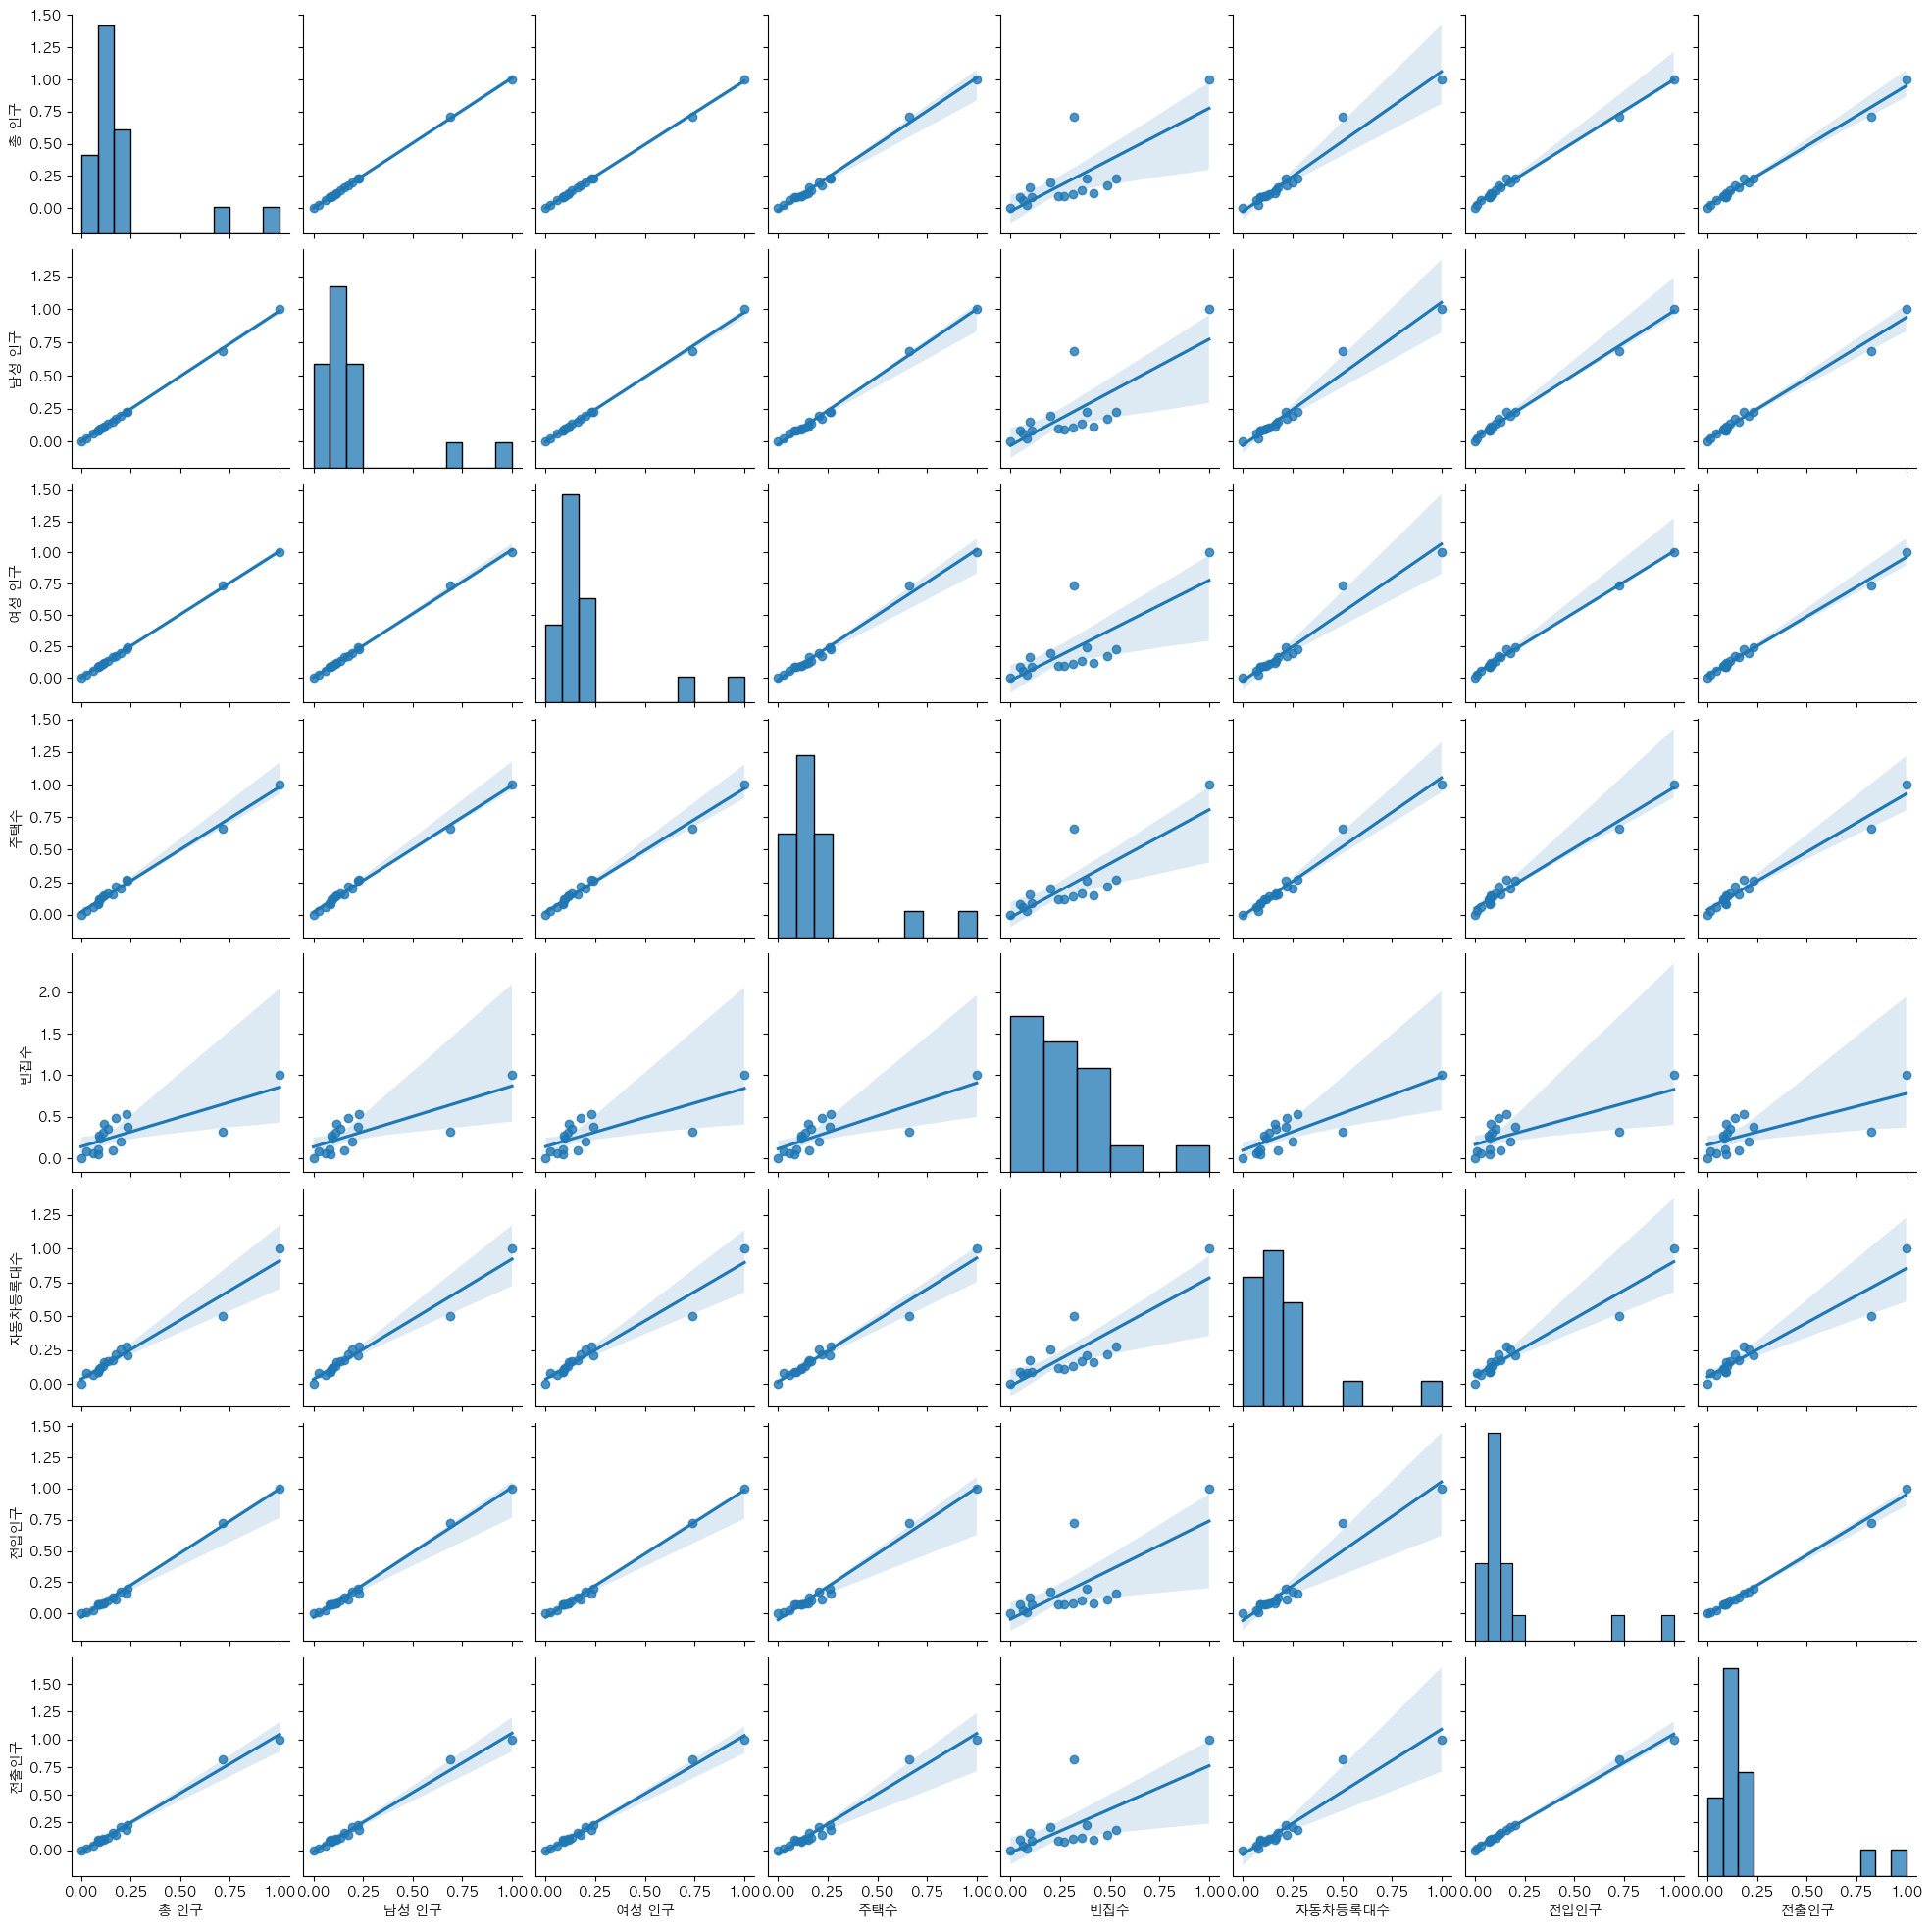

In [105]:
# 총 인구, 남성 인구, 여성 인구, 주택수, 빈집수, 자동차등록대수, 전입인구, 전출인구에 대한 상관관계 시각화
sns.pairplot(
    df_2020_norm,
    vars = df_2020_norm.columns,
    kind = 'reg'
)
plt.show()

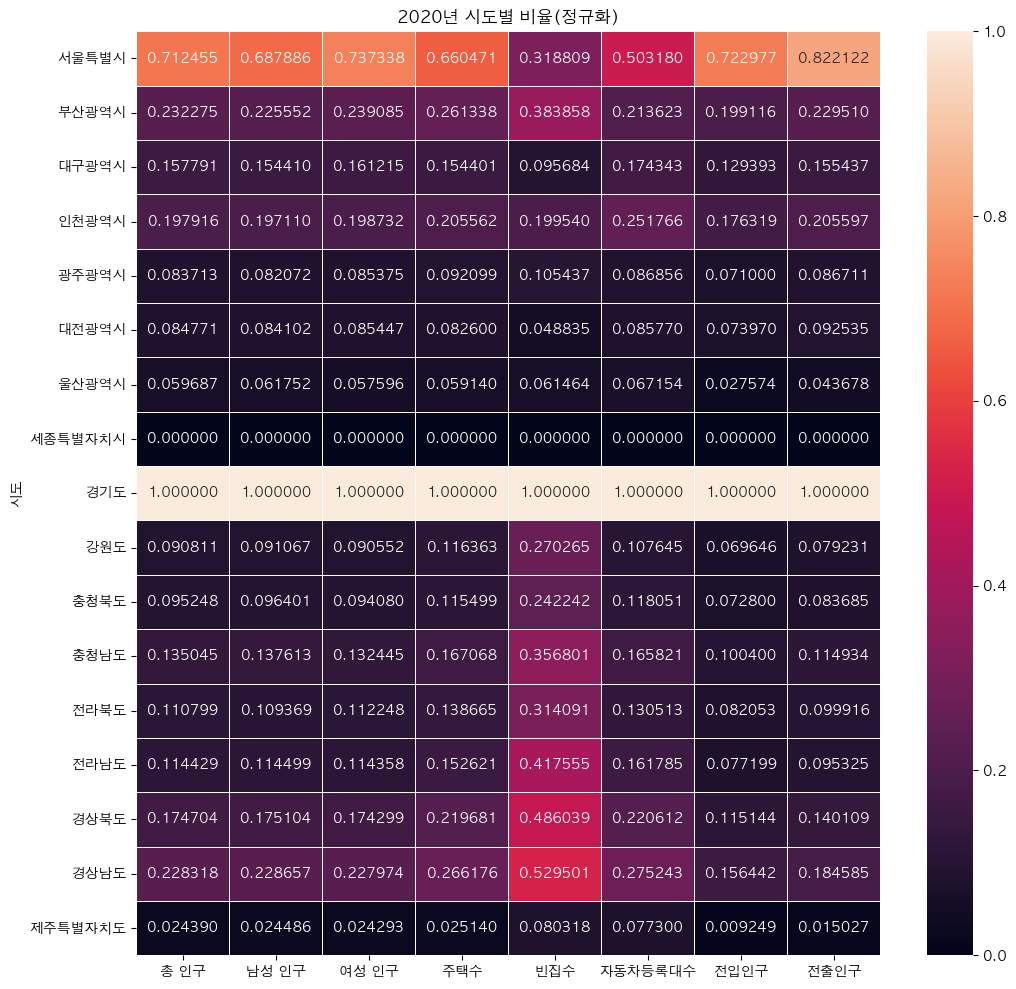

In [106]:
target_col = df_2020_norm.columns

plt.figure(figsize=(12,12))
sns.heatmap(
    df_2020_norm[target_col],
    annot = True, # True로 해야 숫자가 보임
    fmt = 'f', # 실수
    linewidth = 0.5
)
plt.title('2020년 시도별 비율(정규화)')
plt.show()